## Problem Statement

To predict the sales for the next month at a store-item combination.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
sns.set_style('whitegrid')

In [24]:
# reading data
sales = pd.read_csv('sales_train.csv')
item_cat = pd.read_csv('item_categories.csv')
item = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')

In [4]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [25]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [26]:
#as date is of object type. We have to convert to datetime
from datetime import datetime

sales['date'] = sales['date'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))

In [19]:
sales.shape

(2935849, 6)

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [27]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [28]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [36]:
# aggregate by date-block(month),shop_id and item_id
# select the columns date,item_price and item_cnt(sales)
# Provide a dictionary which says what aggregation to perform on which column
# min and max on the date
# average of the item_price
# sum of the sales

In [29]:
#using aggregate functio to group by monthly level data

monthly_sales= sales.groupby(['date_block_num', 'shop_id', 'item_id'])['date','item_price','item_cnt_day'].agg(
    {"date": ['min','max'], 'item_price':'mean','item_cnt_day':'sum'})

<ipython-input-29-56c1485c7e95>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sales= sales.groupby(['date_block_num', 'shop_id', 'item_id'])['date','item_price','item_cnt_day'].agg(


In [37]:
monthly_sales.head(10)

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-03 2013-01-31      221.0          6.0
                       33      2013-01-03 2013-01-28      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0
                       61      2013-01-10 2013-01-10      195.0          1.0
                       75      2013-01-17 2013-01-17       76.0          1.0
                       88      2013-01-16 2013-01-16       76.0          1.0
                       95      2013-01-06 2013-01-06      193.0          1.0
                       96      2013-01-10 2013-01-10       70.0          1.0

In [40]:
# item data

item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [41]:
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [42]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [43]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [44]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [62]:
item_cat.head(15)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [54]:
item.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [61]:
px.bar(data_frame= item, x= item['item_category_id'].value_counts().index, 
       y= item['item_category_id'].value_counts().values,
      title= 'items per category')

## time series analysis

In [63]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


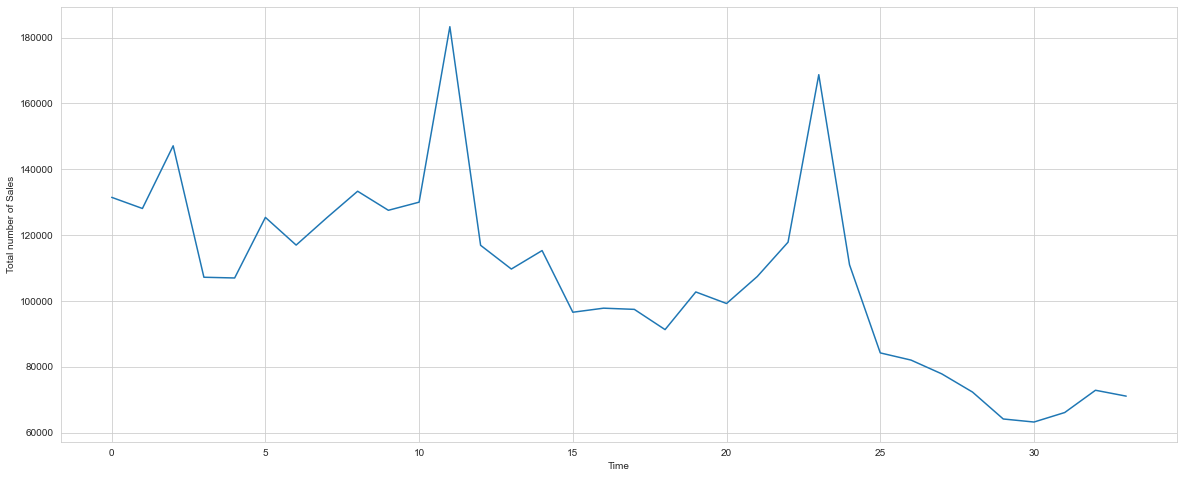

In [65]:
# number of items sold in different months (date_blocK_num feature)
total_sales= sales.groupby('date_block_num')['item_cnt_day'].sum()
plt.figure(figsize=(20,8))
plt.xlabel('Time')
plt.ylabel('Total number of Sales')
plt.plot(total_sales)

In [67]:
# Peaks are observed after a certain time interval: Seasonality
# But there is also a DECREASiNG TREND

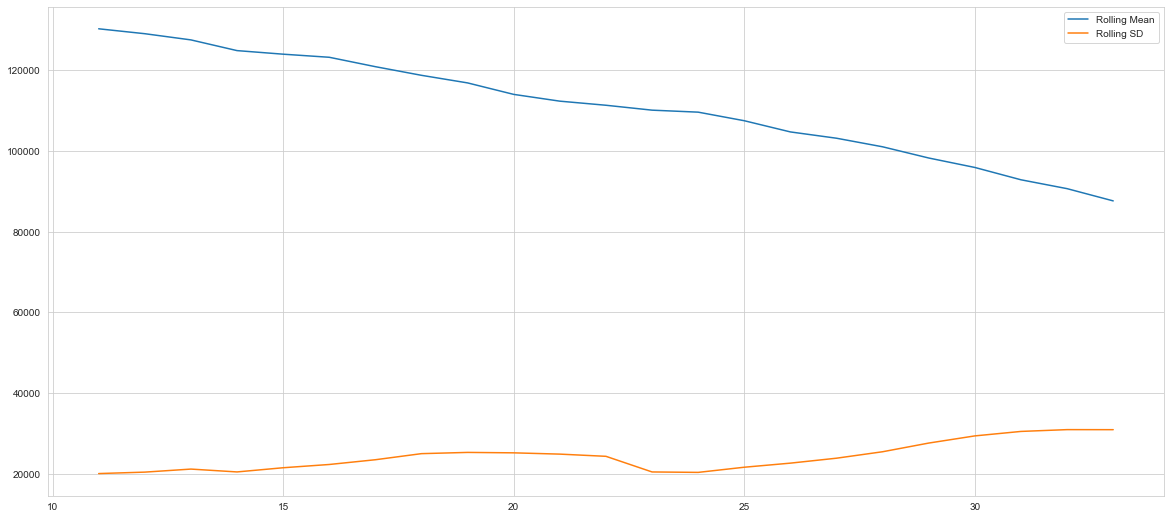

In [66]:
# Rolling Mean
plt.figure(figsize=(20,9))
plt.plot(total_sales.rolling(window=12).mean(), label= 'Rolling Mean')
plt.plot(total_sales.rolling(window=12).std(), label= 'Rolling SD')
plt.legend()

In [68]:
# Decreasing trend confirmed

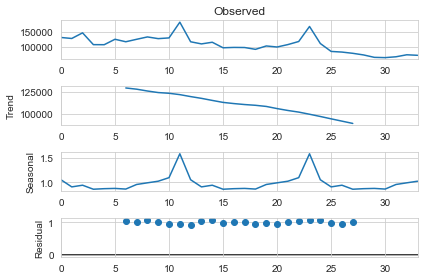

In [89]:
import statsmodels.api as sm
# we are using seasonal_decomposition function to decompose the time series into its trend, seasonal and residual components
#using  a technique such as additive or multiplicative decomposition. This is done by using seasonal_decompose function from
#stats models library

# multiplicative

res = sm.tsa.seasonal_decompose(total_sales.values, period= 12, model= 'multiplicative')
fig = res.plot()

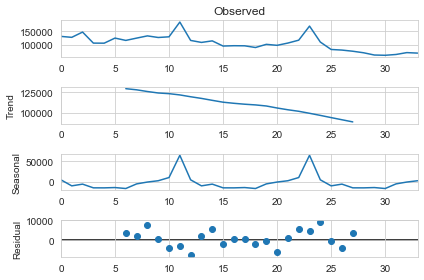

In [73]:
# additive model
res= sm.tsa.seasonal_decompose(total_sales.values, period= 12, model= 'additive')
fig = res.plot()

we assume an additive model, then we can write

 yt=St+Tt+Et

where yt is the data at period t, St is the seasonal component at period t, Tt is the trend-cycle component at period tt and Et is the remainder (or irregular or error) component at period t Similarly for Multiplicative model,

yt=St x Tt x Et

Stationarity refers to time-invariance of a series. (ie) Two points in a time series are related to each other by only how far apart they are, and not by the direction(forward/backward)

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary.

There are multiple tests that can be used to check stationarity. ADF

ADF test

In [88]:
from statsmodels.tsa.stattools import adfuller

#stationarity test
result = adfuller(total_sales)

print('ADF Statistic: ', result[0])
print('p-value: ', result[1])

ADF Statistic:  -2.3957040669944325
p-value:  0.1429525769929046


p-value > 0.05: Null hypothesis is accepted. This means that the time series is not stationary

In [91]:
total_sales= sales.groupby('date_block_num')['item_cnt_day'].sum()

In [96]:
#total_sales is of type float
ts = pd.Series(total_sales)

Text(0.5, 1.0, 'After DETRENDING')

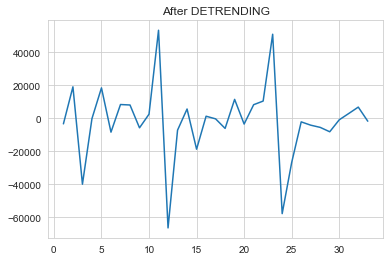

In [98]:
plt.plot(ts.diff())
plt.title('After DETRENDING')

Text(0.5, 1.0, 'After DESEASONALISATION')

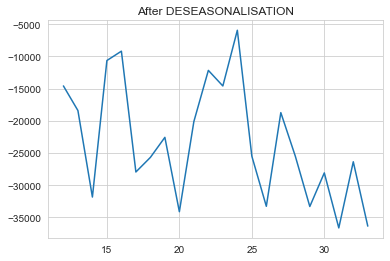

In [102]:
#As we can see that the plot is repeated after 12 months or so. So, seasonality is 12.

new_ts= ts.diff(periods= 12)
plt.plot(new_ts)
plt.title('After DESEASONALISATION')

In [110]:
#now testing the STATIONARITY again after deseasonality: ADF test

from statsmodels.tsa.stattools import adfuller

result = adfuller(new_ts[12:])
print('ADF statistc: ',result[0])
print('p-value: ',result[1])

ADF statistc:  -3.270101192815549
p-value:  0.01626900992370418


P-value < 0.05 So we can reject the null hypothesis. Hence the data is now stationary

### Forecasting

#### AR MA and ARIMA models

Now, we learn about the Auto-Regressive model
This is a simple model, that predicts future performance based on past performance. mainly used for forecasting,

An AR model is a Linear Regression model, that uses lagged variables as input.

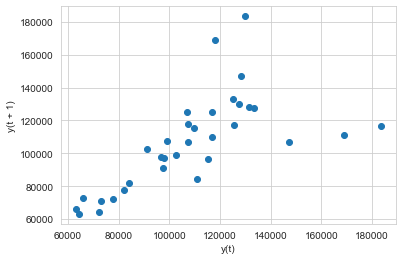

In [111]:
from pandas.plotting import lag_plot
lag_plot(total_sales)
plt.show()

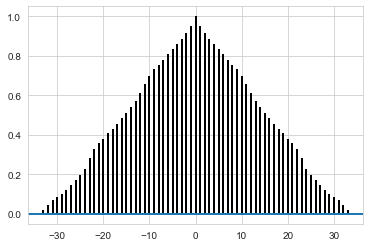

In [114]:
plt.acorr(total_sales, maxlags= None, lw= 2, normed= True)
plt.show()

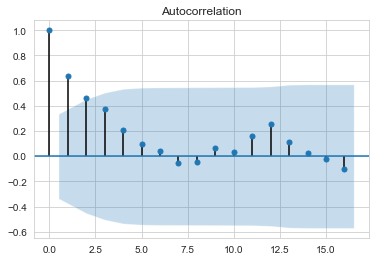

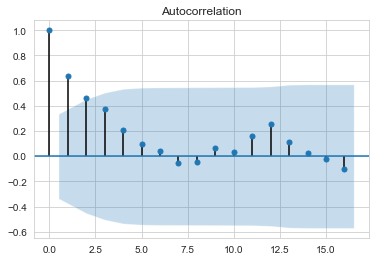

In [116]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(total_sales)

p = 3

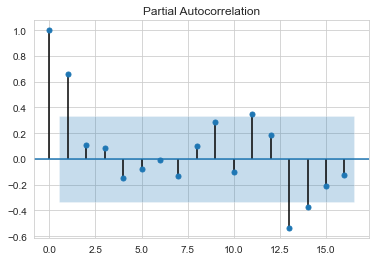

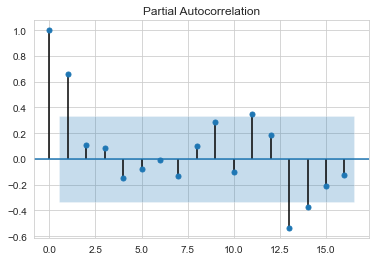

In [117]:
plot_pacf(total_sales)

q = 2

d = 1

In [122]:
from statsmodels.tsa.arima_model import ARIMA

model= ARIMA(total_sales, order= (3,1,2))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

C:\Users\master\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning:

overflow encountered in exp

C:\Users\master\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\master\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning:

overflow encountered in exp

C:\Users\master\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning:

invalid value encountered in true_divide



                             ARIMA Model Results                              
Dep. Variable:         D.item_cnt_day   No. Observations:                   33
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -373.273
Method:                       css-mle   S.D. of innovations          19037.843
Date:                Fri, 27 Jan 2023   AIC                            760.547
Time:                        16:51:25   BIC                            771.022
Sample:                             1   HQIC                           764.072
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1947.5544    587.975     -3.312      0.001   -3099.965    -795.144
ar.L1.D.item_cnt_day    -0.0053      0.637     -0.008      0.993      -1.253       1.242
ar.L2.D.item

C:\Users\master\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

